In [1]:
import pandas as pd

df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


# Exploratory data analysis

In [2]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [2]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [4]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

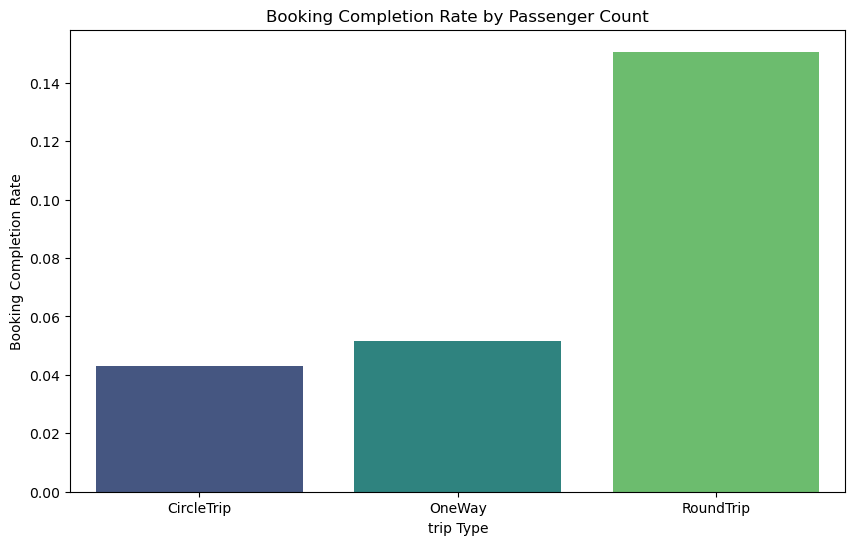

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

completion_rates = df.groupby('trip_type')['booking_complete'].mean().reset_index()
completion_rates.columns = ['trip_type', 'completion_rate']

plt.figure(figsize=(10, 6))
sns.barplot(x='trip_type', y='completion_rate', data=completion_rates, palette='viridis')
plt.xlabel('trip Type')
plt.ylabel('Booking Completion Rate')
plt.title('Booking Completion Rate by Passenger Count')
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


## Data Preprocessing

In [5]:
null_values = df.isnull().sum()
print(null_values)

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

## Data Transforming 

In [7]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

print(df[columns_to_encode].head(10))

   sales_channel  trip_type  flight_day  route  booking_origin
0              0          2           2      0              61
1              0          2           2      0              61
2              0          2           6      0              36
3              0          2           2      0              61
4              0          2           6      0              36
5              0          2           4      0              61
6              0          2           4      0              61
7              0          2           1      0              36
8              0          2           1      0              61
9              1          2           3      0              36


In [9]:
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
5,1,0,2,3,48,20,4,0,61,1,0,1,5.52,0
6,3,0,2,201,33,6,4,0,61,1,0,1,5.52,0
7,2,0,2,238,19,14,1,0,36,1,0,1,5.52,0
8,1,0,2,80,22,4,1,0,61,0,0,1,5.52,0
9,1,1,2,378,30,12,3,0,36,0,0,0,5.52,0


# Machine Learning Models

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (40000, 13)
Shape of X_test :  (10000, 13)
Shape of y_train :  (40000,)
Shape of y_test :  (10000,)


## 1. Logistic Regression : 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")


log = LogisticRegression(max_iter=1000)

log.fit(X_train, y_train)

y_pred_log = log.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy of Logistic Regression : ", accuracy_log*100)

Accuracy of Logistic Regression :  85.2


### Model Evaluation :

In [13]:
clss_log = classification_report(y_test, y_pred_log)
print("Logistic Regression Classification Report : \n",clss_log)

Logistic Regression Classification Report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000



### Interpretation of Results :

In [14]:
coef = log.coef_[0]
features = X_train.columns
feature_importance_logistic = pd.DataFrame({'Feature': features, 'Coefficient': coef}).sort_values(by='Coefficient', ascending=False)
print("Feature Importance for Logistic Regression : \n",feature_importance_logistic)

Feature Importance for Logistic Regression : 
                   Feature  Coefficient
9     wants_extra_baggage     0.447398
10   wants_preferred_seat     0.278213
2               trip_type     0.265576
11  wants_in_flight_meals     0.072282
0          num_passengers     0.018392
6              flight_day     0.011009
8          booking_origin     0.009236
7                   route    -0.000407
3           purchase_lead    -0.000846
5             flight_hour    -0.001011
4          length_of_stay    -0.004324
12        flight_duration    -0.181702
1           sales_channel    -0.564060


### Visualization

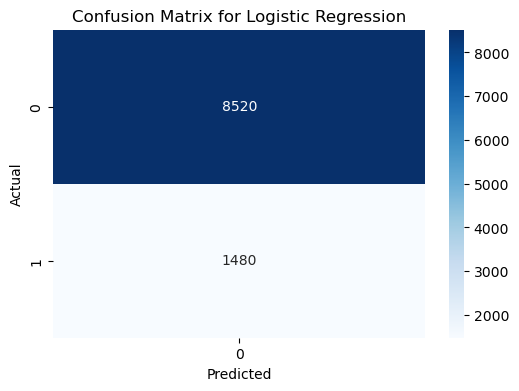

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(y_test, y_pred_log, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

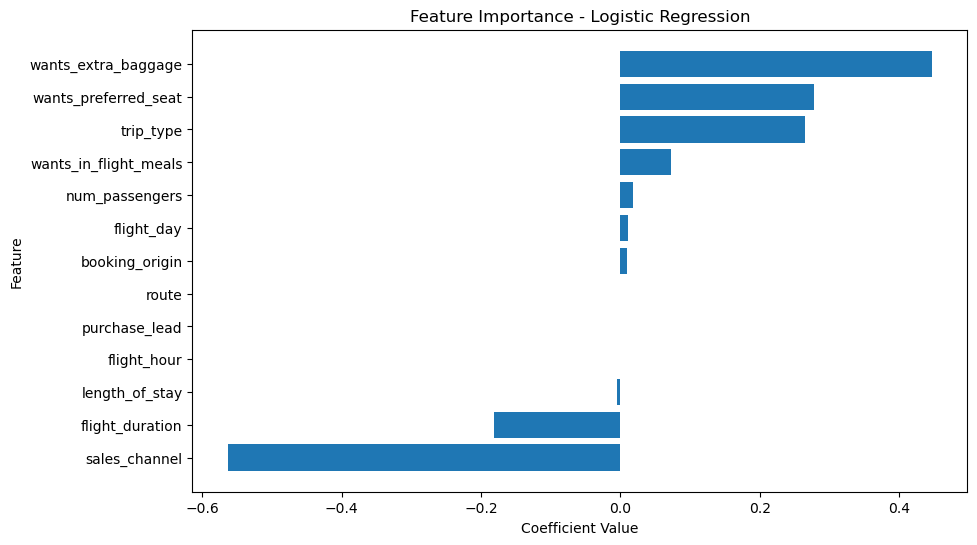

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_logistic['Feature'], feature_importance_logistic['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

## 2. Random Forest Classifier :

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Classifier : ", accuracy_rf*100)

Accuracy of Random Forest Classifier :  85.54


### Model Evaluation :

In [18]:
clss_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report : \n",clss_rf)

Random Forest Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.56      0.10      0.17      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.54      0.55     10000
weighted avg       0.82      0.86      0.81     10000



### Interpretation of Results :

In [19]:
feature_importance_random_forest = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print("Feature Importance for Random Forest Classifier : \n",feature_importance_random_forest)

Feature Importance for Random Forest Classifier : 
                   Feature  Importance
3           purchase_lead    0.194542
7                   route    0.152168
5             flight_hour    0.141921
4          length_of_stay    0.126646
8          booking_origin    0.108562
6              flight_day    0.090668
12        flight_duration    0.071675
0          num_passengers    0.049225
11  wants_in_flight_meals    0.021119
10   wants_preferred_seat    0.015834
9     wants_extra_baggage    0.014482
1           sales_channel    0.011377
2               trip_type    0.001783


### Visualization

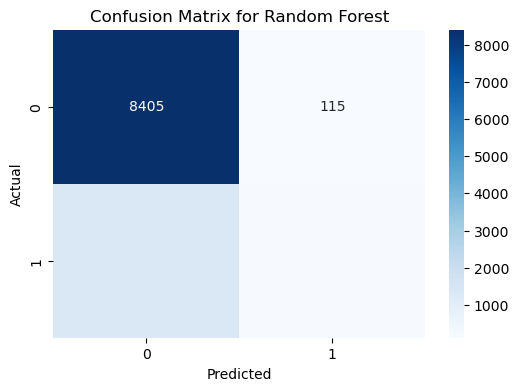

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

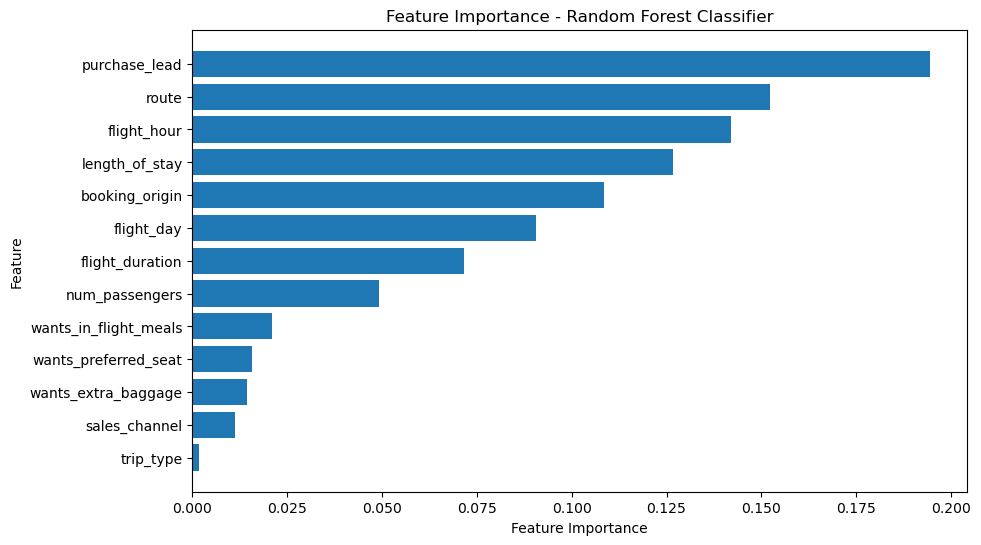

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_random_forest['Feature'], feature_importance_random_forest['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()


## 4. Gradient Boosting Classifier :

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting Classifier :", accuracy_gb*100)

Accuracy of Gradient Boosting Classifier : 85.45


### Model Evaluation :

In [23]:
clss_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classification Report : \n",clss_gb)

Gradient Boosting Classification Report : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      8520
           1       0.71      0.03      0.05      1480

    accuracy                           0.85     10000
   macro avg       0.78      0.51      0.49     10000
weighted avg       0.83      0.85      0.79     10000



### Interpretation of Results :

In [24]:
feature_importance_gradient_boosting = pd.DataFrame({'Feature': X_train.columns, 'Importance': gb.feature_importances_}).sort_values(by='Importance', ascending=False)
print("Feature Importance for Gradient Boosting Classifier : \n",feature_importance_gradient_boosting)

Feature Importance for Gradient Boosting Classifier : 
                   Feature  Importance
8          booking_origin    0.621319
7                   route    0.116361
4          length_of_stay    0.060955
12        flight_duration    0.057463
9     wants_extra_baggage    0.043778
1           sales_channel    0.029415
10   wants_preferred_seat    0.023293
3           purchase_lead    0.020653
11  wants_in_flight_meals    0.015939
0          num_passengers    0.003535
6              flight_day    0.003046
5             flight_hour    0.002477
2               trip_type    0.001766


### Visualization

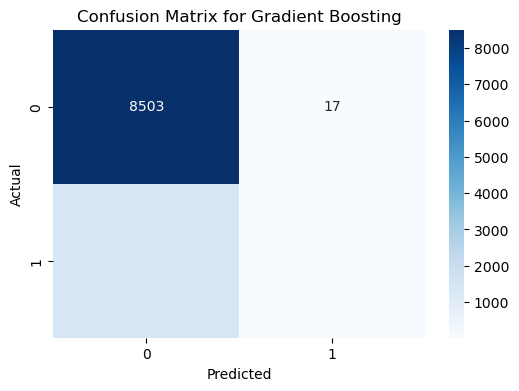

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(y_test, y_pred_gb, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

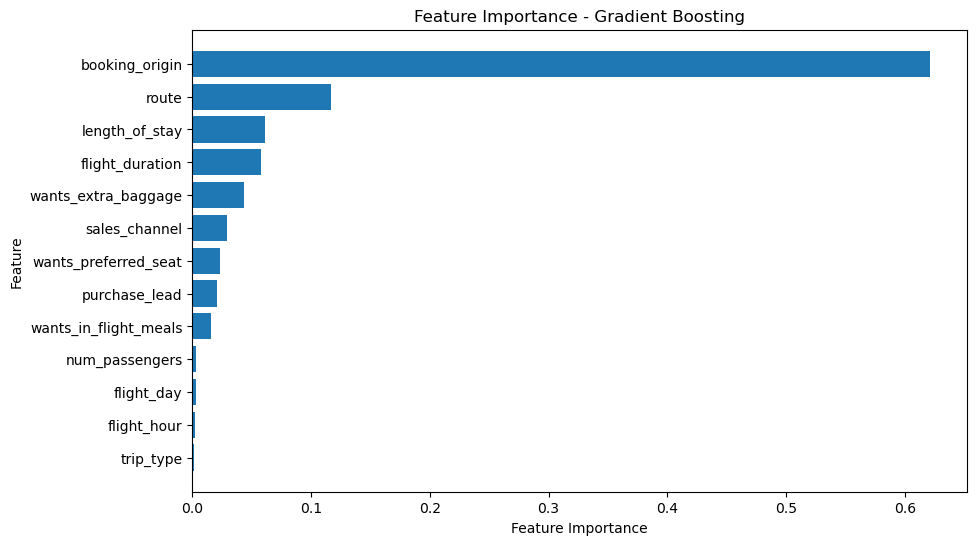

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_gradient_boosting['Feature'], feature_importance_gradient_boosting['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()

## 5. K-Nearest Neighbors (KNN) :

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy K-Nearest Neighbors : ", accuracy_knn*100)

Accuracy K-Nearest Neighbors :  83.15


### Model Evaluation :

In [29]:
clss_knn = classification_report(y_test, y_pred_knn)
print("K-Nearest Neighbors Classification Report : \n",clss_knn)

K-Nearest Neighbors Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      8520
           1       0.35      0.16      0.22      1480

    accuracy                           0.83     10000
   macro avg       0.61      0.55      0.56     10000
weighted avg       0.79      0.83      0.80     10000



### Interpretation of Results :

In [30]:
print("Feature Importance for K-Nearest Neighbors (KNN): KNN does not have interpretable coefficients.")

Feature Importance for K-Nearest Neighbors (KNN): KNN does not have interpretable coefficients.


### Visualization

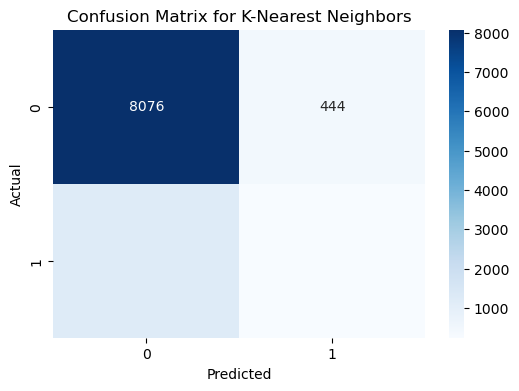

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.show()

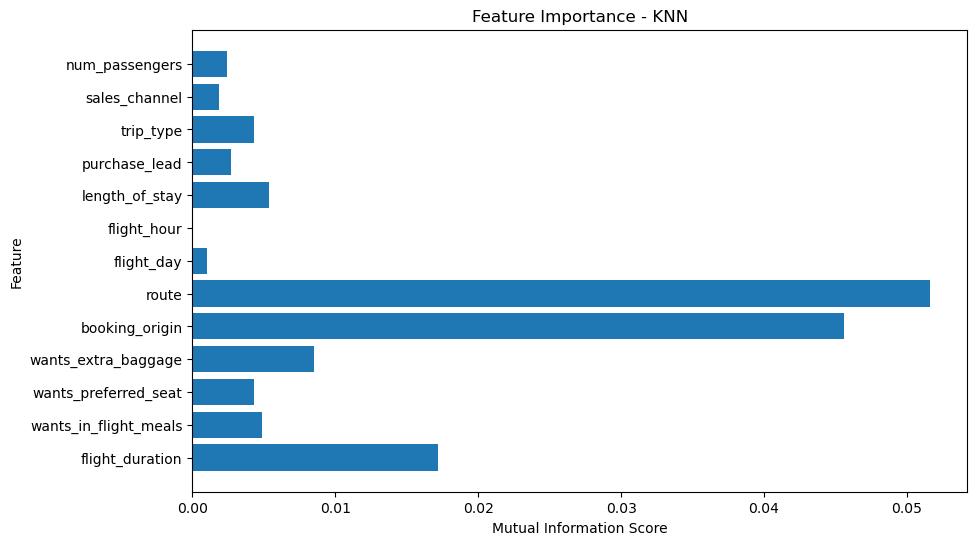

In [32]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

mutual_info = mutual_info_classif(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, mutual_info)
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Feature Importance - KNN')
plt.gca().invert_yaxis()
plt.show()